This notebook plots a qubit and the control

In [1]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["figure.figsize"] = [6, 2]
rcParams["figure.dpi"] = 350
rcParams["font.size"] = 14

import pandas as pd
import numpy as np
import jax.numpy as jnp
import jax

In [2]:
pauli_x = [[0., 1.], [1., 0.]]
pauli_y = [[0., -1.j], [1.j, 0.]]
pauli_z = [[1., 0.], [0., -1.]]

pauli = jnp.asarray([pauli_x, pauli_y, pauli_z], dtype=complex)

basis = jnp.asarray([
    [[1, 0], [0, 0]],
    [[0, 1], [0, 0]],
    [[0, 0], [1, 0]],
    [[0, 0], [0, 1]],
])

Here we simulate the following quantum evolution:
$$
\begin{align}
H = & \omega_0\sigma_z + h(t) \sigma_x
\end{align}
$$

In [48]:
# Determininstic evolution
omega0 = 1.
hamiltonian0 = omega0*pauli[2]

# Initial conditions
psi0 = jnp.asarray([1, 0], dtype=complex)

# Cost function
O_target = -pauli[1]

# Set-up simulation
times = jnp.linspace(0, 0.857129, 50)

control = [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.3058823529411763, -0.015686274509803866, -0.015686274509803866, -0.015686274509803866, -0.015686274509803866, -0.015686274509803866, -0.07843137254901977, 0.10980392156862706, -0.015686274509803866, -0.015686274509803866, -0.015686274509803866, 0.0470588235294116, -0.0470588235294116, 0.0470588235294116, -0.015686274509803866, -0.015686274509803866, -0.07843137254901977, 0.015686274509803866, 0.015686274509803866, 0.015686274509803866, 0.0470588235294116, -0.1098039215686275, 0.015686274509803866, 0.015686274509803866, 0.015686274509803866, 0.015686274509803866, 0.10980392156862706, -0.015686274509803866, -0.0470588235294116, -0.015686274509803866, -0.14117647058823524, 0.0470588235294116, 0.015686274509803866, 0.015686274509803866, 0.015686274509803866, 0.42352941176470615, -0.392156862745098, 0.015686274509803866, 0.7058823529411766]
    
if len(control) == len(times):
    print('Congruent arrays')

Congruent arrays


In [49]:
# Run simulation
psi_data = [psi0]
psi = psi_data[0]

for idx in range(len(times)):
    
    t = times[idx]
    dt = times[1] - times[0]

    # Time evolution
    field = control[idx] # Protocol0
    hamiltonian = hamiltonian0 + field * pauli[0]
    gate = jax.scipy.linalg.expm(-1.0j * hamiltonian * dt)
    psi = jnp.einsum('ij, j -> i', gate, psi)
    #psi = psi / jnp.linalg.norm(psi) # Normalise
    psi_data.append(psi)
    
    


In [50]:
# Plot the state evolution
bloch_sphere_data = [jnp.einsum('i, aij, j -> a', jnp.conj(psi), pauli, psi) for psi in psi_data]
bloch_sphere_data

[Array([0.+0.j, 0.+0.j, 1.+0.j], dtype=complex64),
 Array([ 0.00244364+0.j, -0.13945466+0.j,  0.9902256 +0.j], dtype=complex64),
 Array([ 0.0097238 +0.j, -0.27601275+0.j,  0.96110505+0.j], dtype=complex64),
 Array([ 0.02168927+0.j, -0.40683785+0.j,  0.9132433 +0.j], dtype=complex64),
 Array([ 0.03809152+0.j, -0.52921253+0.j,  0.84763443+0.j], dtype=complex64),
 Array([ 0.05858985+0.j, -0.64059496+0.j,  0.76564115+0.j], dtype=complex64),
 Array([ 0.08275851+0.j, -0.7386718 +0.j,  0.66896665+0.j], dtype=complex64),
 Array([ 0.11009549+0.j, -0.8214057 +0.j,  0.55961883+0.j], dtype=complex64),
 Array([ 0.14003299+0.j, -0.88707834+0.j,  0.43986902+0.j], dtype=complex64),
 Array([ 0.17194913+0.j, -0.93432546+0.j,  0.31220457+0.j], dtype=complex64),
 Array([ 0.20518106+0.j, -0.9621659 +0.j,  0.17927712+0.j], dtype=complex64),
 Array([ 0.23903845+0.j, -0.97002107+0.j,  0.04384759+0.j], dtype=complex64),
 Array([ 0.2728464 +0.j, -0.961454  +0.j, -0.03410968+0.j], dtype=complex64),
 Array([ 0.30

In [60]:
def control_theory(t):
    if t < 0.198071:
        return 4.
    else:
        return 0.

In [61]:
control_theory_data = [control_theory(t) for t in times]

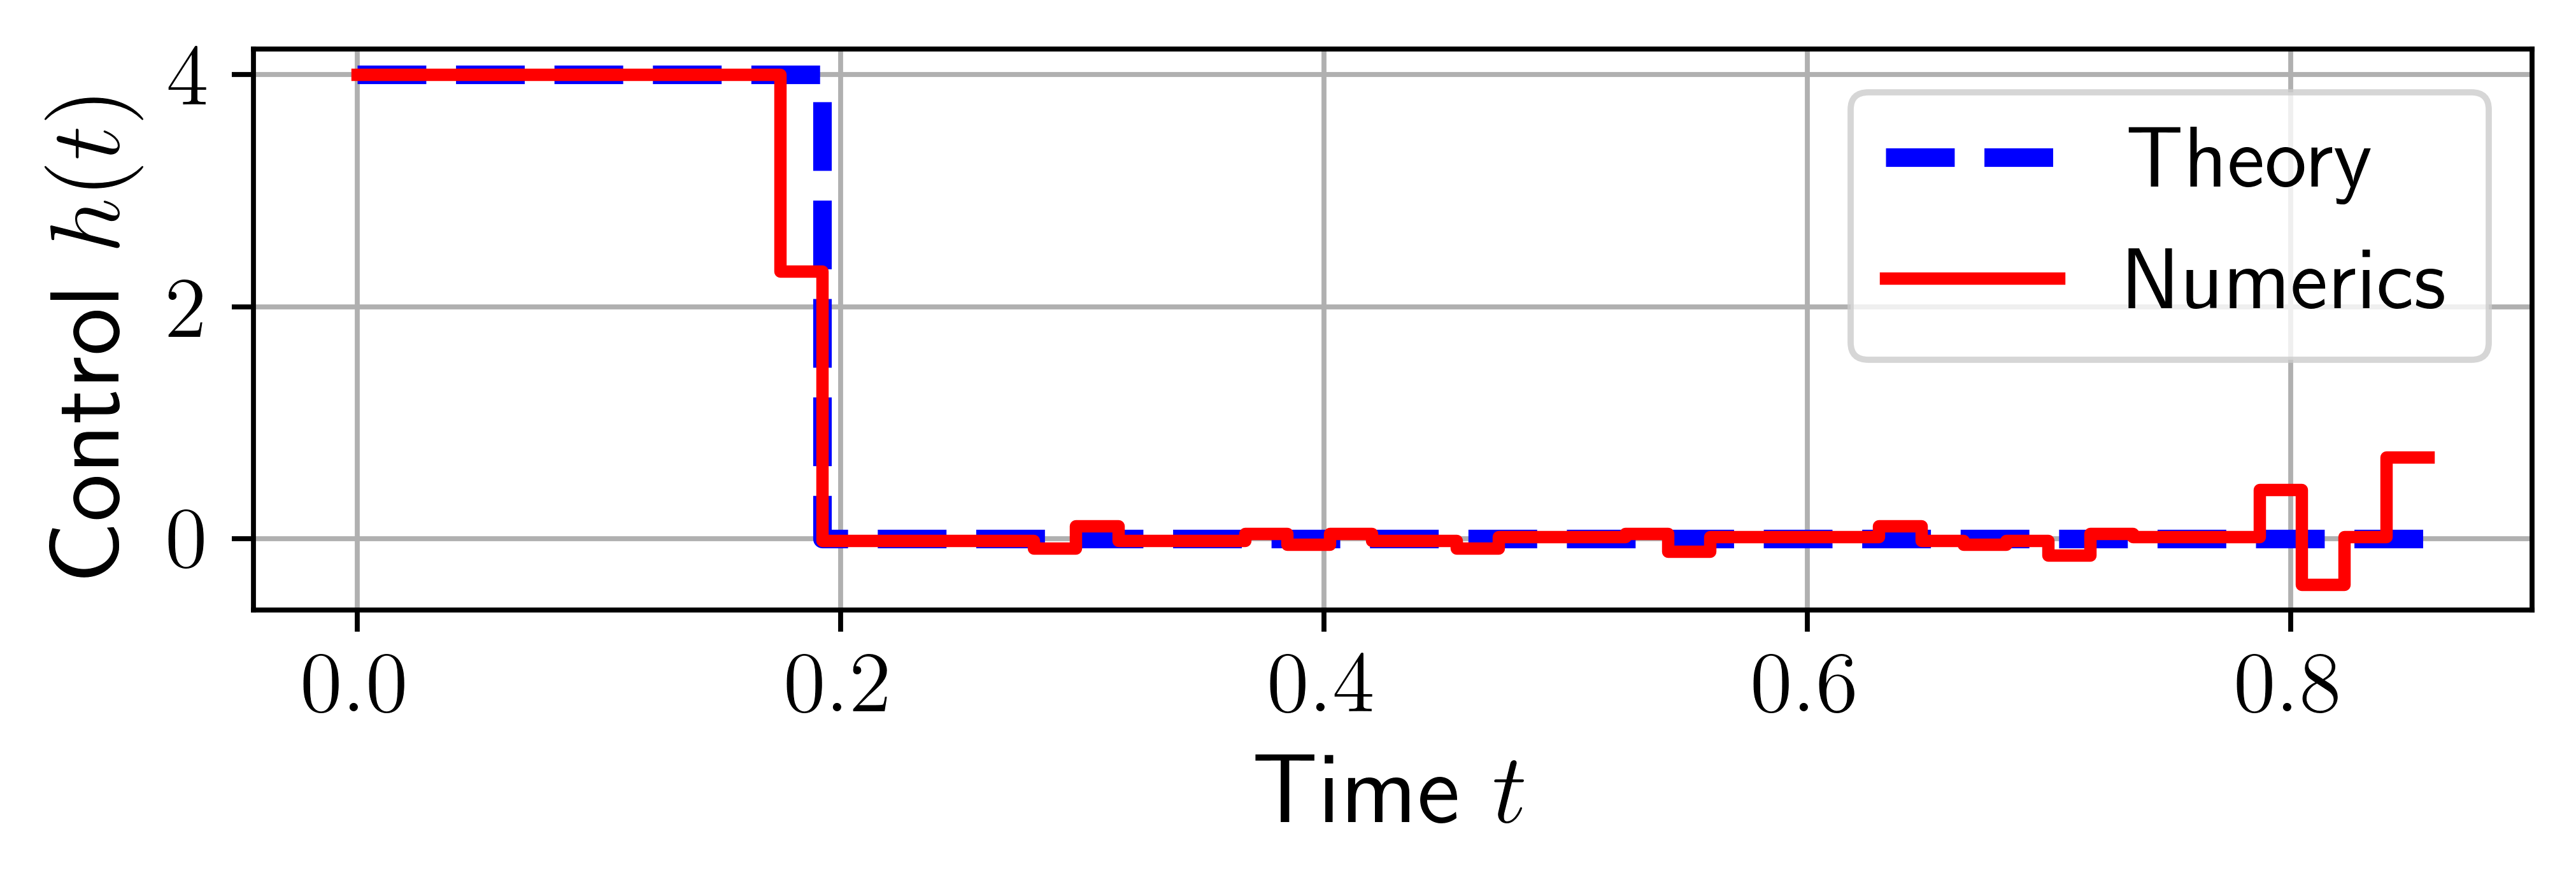

In [76]:
fig, ax = plt.subplots(figsize=(6,2.2))

# -------------------BEGIN-CHANGES------------------------
# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc('text', usetex=True)
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
# --------------------END CHANGES------------------------


ax.step(times, control_theory_data, color='b', label="Theory", ls='--', linewidth=3)
ax.step(times, control, color='r', label="Numerics", linewidth=2)
plt.xlabel('Time $t$')
plt.ylabel('Control $h(t)$')
#plt.xlim(0,1)
#plt.ylim(-4.1,4.1)
#plt.axhline(y = -7.174305188161573, color = 'b', linestyle = '--', label='DMRG')
#plt.ylim(-8,2)
ax.legend()

# Hide the all but the bottom spines (axis lines)
##ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(True)
#ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.grid()
plt.tight_layout()
plt.show()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


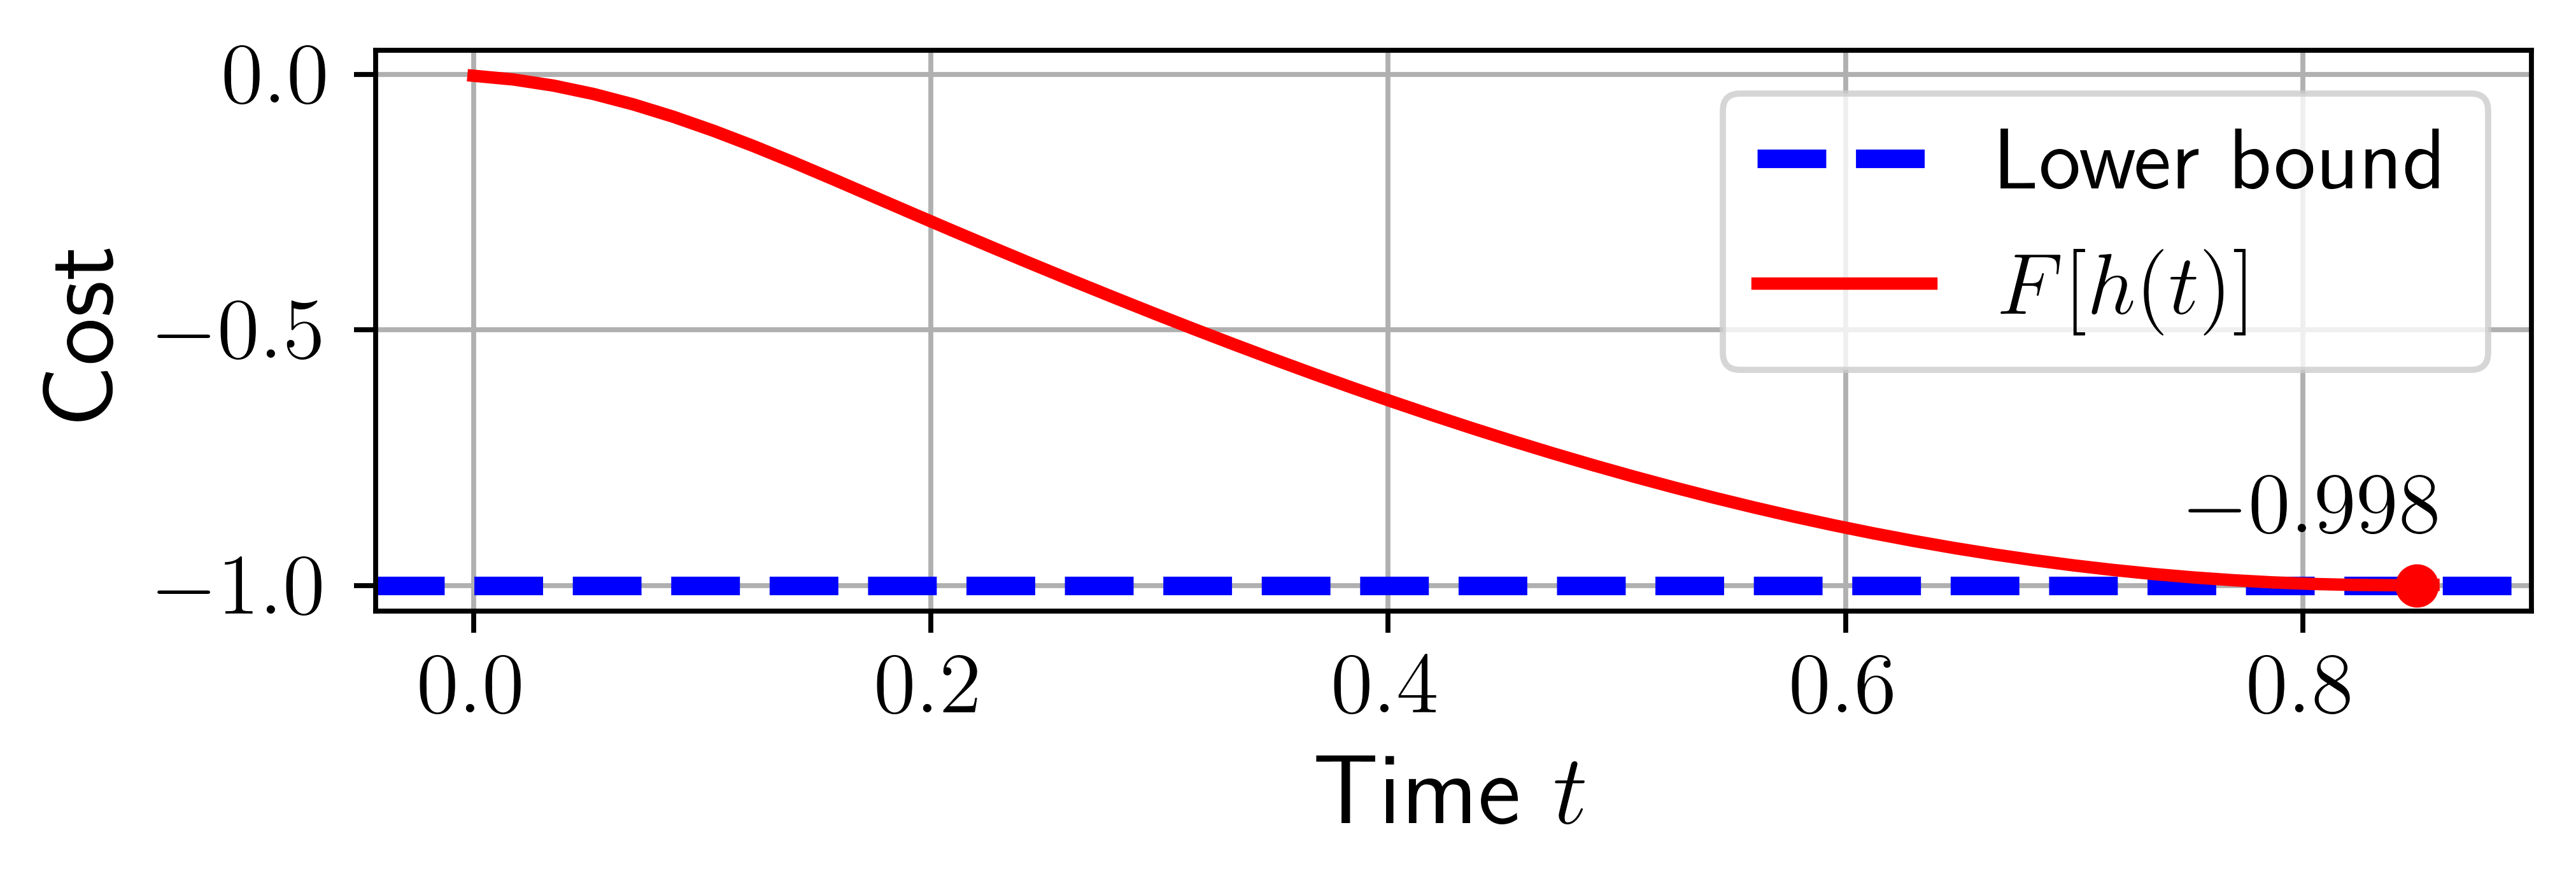

In [81]:
fig, ax = plt.subplots(figsize=(6, 2.2))

# -------------------BEGIN-CHANGES------------------------
# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc('text', usetex=True)
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
# --------------------END CHANGES------------------------


plt.axhline(y = -1, color = 'b', linestyle = '--', linewidth=3, label='Lower bound')
ax.plot(times, -jnp.asarray(bloch_sphere_data)[1:,0], color='r', label="$F[h(t)]$", linewidth=2)
plt.xlabel('Time $t$')
plt.ylabel('Cost')

ax.plot(0.85,-1,'ro') 

#plt.xlim(0,1)
#plt.ylim(-1,-0.8)
plt.text(0.75, -0.9, "$-0.998$")
#plt.ylim(-8,2)
ax.legend()

# Hide the all but the bottom spines (axis lines)
##ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(True)
#ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines

ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
ax.grid()
plt.tight_layout()
plt.show()

In [9]:
# On the Bloch Sphere

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np

def bloch_sphere():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect("equal")


    # Make data
    r = 1
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v))
    y = r * np.outer(np.sin(u), np.sin(v))
    z = r * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color='linen', alpha=0.2)

    # plot circular curves over the surface
    theta = np.linspace(0, 2 * np.pi, 100)
    z = np.zeros(100)
    x = r * np.sin(theta)
    y = r * np.cos(theta)

    ax.plot(x, y, z, color='black', alpha=0.50)
    ax.plot(y, z, x, color='black', alpha=0.50)

    ## add axis lines
    zeros = np.zeros(1000)
    line = np.linspace(-r,r,1000)

    ax.plot(line, zeros, zeros, color='black', alpha=0.50)
    ax.plot(zeros, line, zeros, color='black', alpha=0.50)
    ax.plot(zeros, zeros, line, color='black', alpha=0.50)

    # draw a point
    eps = 0.2
    ax.text(1+eps,0,0,'$x$')
    ax.text(0,1+eps,0,'$y$')
    ax.text(0,0,1+eps,'$+z$')
    ax.text(0,0,-1-eps,'$-z$')


    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-1,1)


    ax.set_axis_off()
    ax.azim = 45

    return fig, ax

MovieWriter ffmpeg unavailable; using Pillow instead.


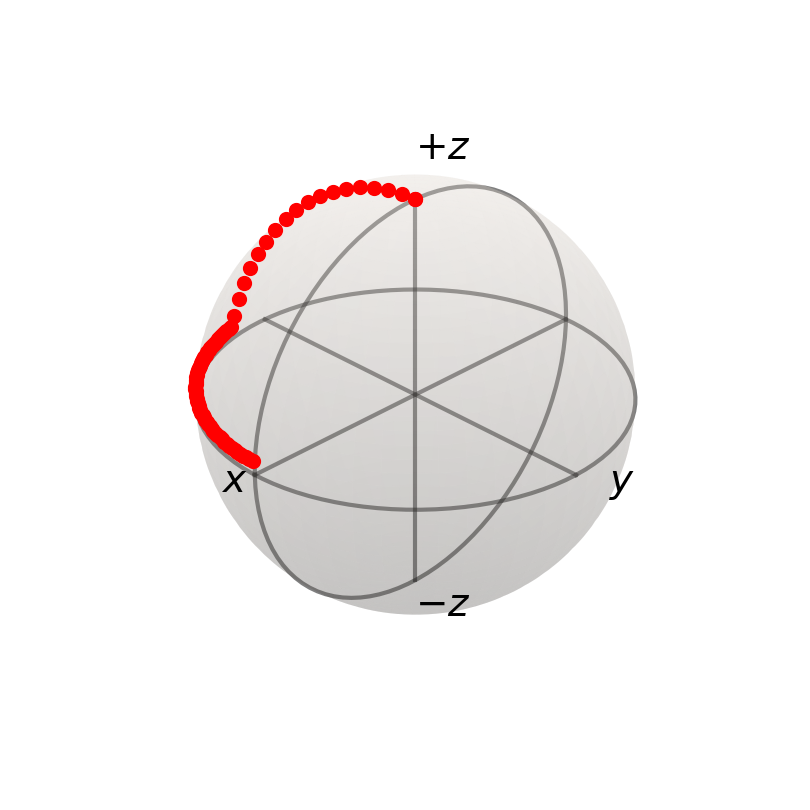

In [10]:
# Plotting

fig, ax = bloch_sphere()
# Animation

N = len(bloch_sphere_data)

# points on bloch sphere
points = jnp.asarray(bloch_sphere_data)
points = jnp.real(points)


def update(num):
    tail_len = 0
    tail_index = max(num - tail_len, 0)
    head_index = max(num - 1, 0)
    ax.scatter(points[tail_index:head_index, 0], points[tail_index:head_index, 1], points[tail_index:head_index, 2], alpha = 0.1, color='k')
    ax.scatter(points[num, 0], points[num, 1], points[num, 2], color='r')

ani = animation.FuncAnimation(fig, update, N, interval=1000/N, blit=False)
ani.save('my_animation6.gif')
plt.show()

In [31]:
bloch_sphere_data[-2]

Array([ 0.05502526+0.j, -0.9955874 +0.j, -0.07599235+0.j], dtype=complex64)